# Forecasting
Now we load in the data that was retrieved by the feature selection done in the notebook Teleconnections.ipynb.

In [9]:
%load_ext autoreload
%autoreload 2
import os, inspect, sys
import numpy as np
import pandas as pd
main_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) # script directory
python_dir = os.path.join(main_dir, 'RGCPD')
if python_dir not in sys.path:
    sys.path.append(main_dir)
    sys.path.append(python_dir)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from func_fc import fcev

4 cpu's detected


In [3]:
path_data = main_dir + '/data/eUS_10jun-19aug_lag10-10/random5_s1/None_at0.01_tau_0-1_conds_dimNone_combin2_dt10.h5'
fc = fcev(path_data=path_data)
fc.df_data

t2m_eUS  10..1..sst_test  10..2..sst_test  TrainIsTrue  RV_mask
0 1979-01-11  2.450949         0.197702         0.158988         True    False
  1979-01-21  5.202951         0.537236        -0.089465         True    False
  1979-01-31  1.976927         0.275490        -0.094195         True    False
  1979-02-10  0.300682         0.595428        -0.250344         True    False
  1979-02-20  3.358494         1.045556        -0.249611         True    False
...                ...              ...              ...          ...      ...
4 2018-11-17  1.427837        -0.469030         0.874667         True    False
  2018-11-27  4.672652        -0.278696         0.828334         True    False
  2018-12-07  1.403350        -0.335989         0.653152         True    False
  2018-12-17  6.580028        -0.193290         0.460272         True    False
  2018-12-27  6.242537        -0.154770         0.312613         True    False

[7200 rows x 5 columns]

In [4]:
fc.get_TV(kwrgs_events=None)

Define statmodel:

In [5]:
logit = ('logit', None)

logitCV = ('logitCV',
          {'class_weight':{ 0:1, 1:1},
           'scoring':'brier_score_loss',
           'penalty':'l2',
           'solver':'lbfgs',
           'max_iter':100})

In [6]:
fc.fit_models(stat_model_l=[logitCV, logit], lead_max=35, 
                   keys_d='all', kwrgs_pp={})

getting keys associated with name all
tfreq: 10, max lag: 4, i.e. 35 days
('logitCV', {'class_weight': {0: 1, 1: 1}, 'scoring': 'brier_score_loss', 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 100})
1.1695396900177002


('logit', None)
0.535210132598877




In [7]:
dict_experiments = {}       
fc.perform_validation(n_boot=100, blocksize='auto', 
                              threshold_pred=(1.5, 'times_clim'))
dict_experiments['test'] = fc.dict_sum

0 logitCV
1 logit


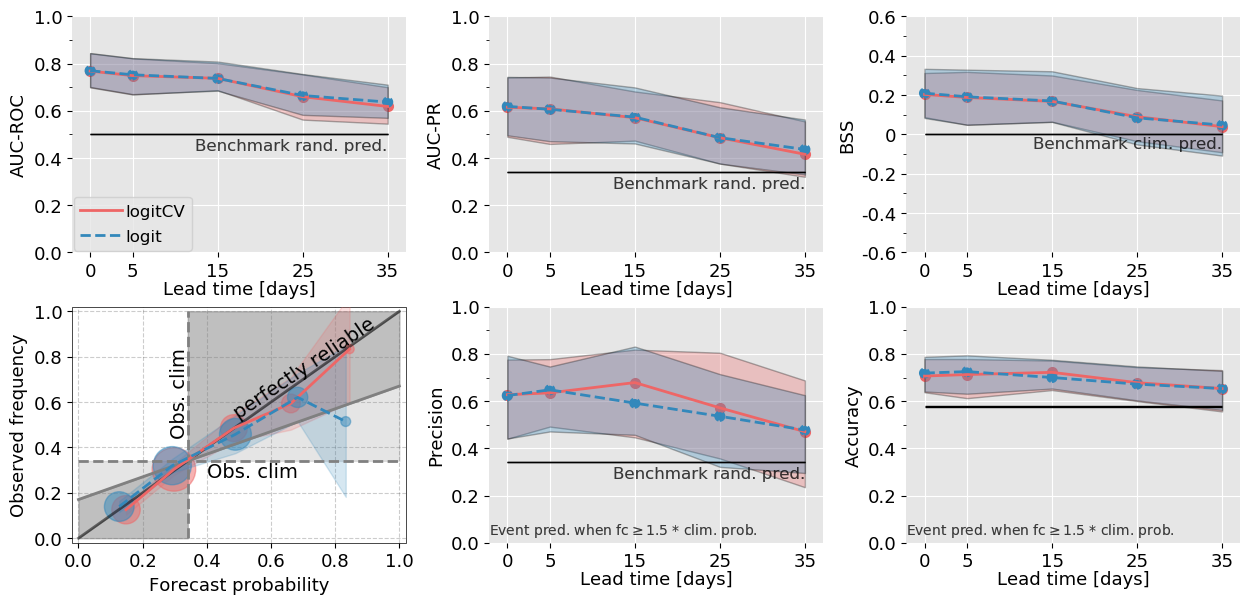

In [8]:
import valid_plots as dfplots
kwrgs = {'wspace':0.25, 'col_wrap':3, 'threshold_bin':fc.threshold_pred}
met = ['AUC-ROC', 'AUC-PR', 'BSS', 'Rel. Curve', 'Precision', 'Accuracy']
expers = list(dict_experiments.keys())
models   = list(dict_experiments[expers[0]].keys())
line_dim = 'model'


fig = dfplots.valid_figures(dict_experiments, expers=expers, models=models,
                          line_dim=line_dim, 
                          group_line_by=None,  
                          met=met, **kwrgs)